In [1]:
'''
Here we will create a simple neural nets that performa simple liunear fit to 2-D data.
Steps: We will build a graph
        initiate a session
        Feed data in and get the output.
        Basically like wx+b=z
        w=weight which we store in variable
        x=values where we store in place holder
        b=Bias where we store in variable
        z=output

important notes: Where ever we are using variables we have to initialise the global variable initialiser.
'''
import numpy as np
import tensorflow as tf

In [2]:
#Lets get some random seed values
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
#lets create a random data with shape 5 X 5
rand_a=np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
#Lets crat another randomnow with 5 X 1
rand_b=np.random.uniform(0,100,(5,1))


In [5]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [6]:
#now we will create place holder for random objects.
a=tf.placeholder(tf.float32)
b=tf.placeholder(tf.float32)

In [7]:
#Now lets create some operations Adda and Matrix multiplication.
add_op= a + b

In [8]:
mul_op= a * b

In [9]:
#Now lets create a session and we use graphs
with tf.compat.v1.Session() as sess:
    #Here add_op is a+b which they are place holders and we need to give them some data to feed.
    add_result=sess.run(add_op,feed_dict={a:10,b:20})
    print(add_result)

30.0


In [10]:
#So here instead of 10 we will add the random values
with tf.compat.v1.Session() as sess:
    add_result=sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    print('\n')
    mul_result=sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print(mul_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Now all set we will create a neural nets

## We will create a simple linear regression

In [11]:
#Lets create featuers
n_features=10
#Neurons
n_dense_neurons=3


In [12]:
#We will create place holder
x=tf.placeholder(tf.float32,shape=(None,n_features))


In [13]:
#Lets create variables for weights
w=tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b=tf.Variable(tf.ones([n_dense_neurons]))

In [14]:
#Lets have operation wx+b
xw=tf.matmul(x,w)
z=tf.add(xw,b)

### Now lets pass the equation to activation function


In [15]:
a=tf.sigmoid(z)

In [16]:
### Lets initialise the global variable initialiser
init=tf.global_variables_initializer()

### Lets run this in a session


In [17]:
with tf.compat.v1.Session() as sess:
    #global initializer
    sess.run(init)
    
    #Now lets run the equation
    layer_out=sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [18]:
print(layer_out)

[[0.19592889 0.8423014  0.36188066]]


## Here we wont simply assign and calculate values of neural nets simply, we wil go back and adjust the weights
### Which is known as back propagation

## Here we will take some more realistic example and we will adjust the weights and bias.
# Simple Regression
## This is a machine learning concept where 

In [19]:
x_data=np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [20]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [21]:
y_label=np.linspace(0,10,10) +  np.random.uniform(-1.5,1.5,10)

In [22]:
y_label

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [23]:
#lets plot the data
import matplotlib.pyplot as plt
%matplotlib inline

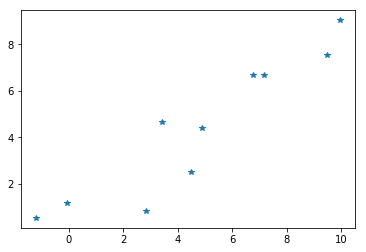

In [24]:
plt.plot(x_data,y_label,'*')

# Here we have the data. points are 10 with x and y co-ordinates.
## Now lets start building neural nets

# We will solve y=mx+b

In [25]:
#Firstly we will take fome random values for weights and biases
np.random.rand(2)

array([0.44236813, 0.87758732])

In [26]:
m=tf.Variable(0.65)

b=tf.Variable(0.42)

## Lets createa cost function 
### this is like minimizing the error.
#### In this we use the squared difference of expecred out put and actual output.

In [27]:
error= 0
for x,y in zip(x_data,y_label):
    #Expected output
    y_hat=m*x+b
    
    #Lets see the cost function
    error += (y-y_hat)**2
    

None
12.051334


### Lets create a optimizer using gradien descent
#### In this we will provide the learning rate value is to how fast the neural net shoould learn.

In [28]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
#Here we have to tell the optimizer to minimise the error.
train=optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [42]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(train))

None


In [29]:
init=tf.global_variables_initializer()

In [39]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    #We have to decide the training steps
    training_steps=1
    for i in range (training_steps):
        sess.run(train)
        
        final_slope,final_intercept=sess.run([m,b])
        

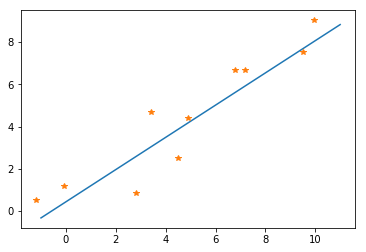

In [31]:
x_test=np.linspace(-1,11,10)
#y=mx+b
y_pred=final_slope*x_test + final_intercept

plt.plot(x_test,y_pred)
#plot the real data
plt.plot(x_data,y_label,'*')

### For one training set we had a pretty good training model. 
#### Now lets increase to 100 training steps.


In [32]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    training_steps=100
    for i in range(training_steps):
        sess.run(train)
        final_slop,final_intercept=sess.run([m,b])
        prin()

## Now lets plt the results

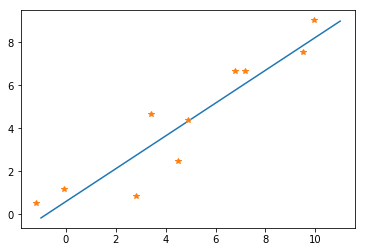

In [33]:
x_test=np.linspace(-1,11,10)
#y=mx+b
y_pred=final_slope*x_test + final_intercept

plt.plot(x_test,y_pred)
#plot the real data
plt.plot(x_data,y_label,'*')

In [34]:
### The above one is little better.

In [44]:
with tf.compat.v1.Session() as sess:
    sess.run(init)
    
    training_steps=50
    for i in range(training_steps):
        sess.run(train)
        final_slop,final_intercept=sess.run([m,b])
        print(final_slop)
        
        print(final_intercept)
        print('\n')

0.7628271
0.4377201


0.79450077
0.44430882


0.8032383
0.44774038


0.80549437
0.45026872


0.8059201
0.452531


0.80582994
0.45470738


0.8055954
0.45684883


0.80532146
0.45896986


0.80503786
0.46107465


0.80475295
0.46316442


0.80446905
0.4652396


0.8041869
0.46730042


0.8039066
0.46934694


0.80362827
0.4713793


0.8033518
0.47339764


0.8030773
0.475402


0.80280465
0.4773925


0.80253386
0.47936922


0.802265
0.48133227


0.80199796
0.48328176


0.8017328
0.48521775


0.80146945
0.48714036


0.8012079
0.48904967


0.8009482
0.4909458


0.8006903
0.49282876


0.8004342
0.4946987


0.80017984
0.49655572


0.79992723
0.49839988


0.79967636
0.5002313


0.7994272
0.5020501


0.79917985
0.5038563


0.79893416
0.50565


0.7986902
0.50743127


0.79844785
0.5092002


0.7982073
0.51095694


0.7979683
0.5127015


0.797731
0.514434


0.79749537
0.5161545


0.7972613
0.51786315


0.7970289
0.51956


0.7967981
0.52124506


0.7965689
0.52291846


0.79634124
0.5245803


0.7961152
0.526230